# Exercise: Root Finding 1
**강좌**: *Numerical Analysis*

**Due**: 2024/10/1

## Problem #1
Write a function to find a root using the Bisection method with the following specifications:
- Use a for loop with a specified maximum number of iterations.
- Input parameters
   * start and end of the braket (*a* and *b*)
   * function *f*
   * tolerance *tol*
   * maximum iterations *iter_max*
   * (Optional) Boolean verbose keyword to print intermediate results. The default is False.
- Additionally, include a proper docstring to describe the function's behavior, parameters, and return values.

In [1]:
# Write your answer
# Write your answer
def bisect(a, b, f, tol=1e-6, iter_max=50):
    # YOUR CODE HERE
    '''
    Bisection method

    Parameters
    ----------
    a : float
        lower limit
    b : float
        upper limit
    f : function
        함수
    tol : float
        tolerance
    iter_max : int
        maximun iterations
    '''
    fa,  fb = f(a), f(b)
    product = f(a)*f(b)
    #구간 경계에서 해가 존재하는 경우
    if product == 0 :
      if fa == 0 :
        print(f'Converged : {a}')
        return a

      else :
        print(f'Converged : {b}')
        return b

    #구간 내에 해가 없을 경우
    elif product > 0 :
       raise ValueError('Wrong Intervals')

    else : #구간 내 해가 있고 경계가 해가 아닐 때 bisection method를 진행
      #Compute midpoint
      c = 0.5*(a+b)
      for i in range(iter_max) :
        if f(a)*f(c) < 0 :
          b = c

        elif f(b)*f(c) < 0 :
          a = c
        #Save old midpoint
        c0 = c

        #Compute new midpoint
        c = 0.5*(a+b)

        eps_ai = abs(c-c0)/max(abs(c), tol)
        if eps_ai < tol :
          print(f'Converged at {c}')

          return c

In [2]:
import numpy as np
f = lambda x: x**2 + 10*np.sin(x)

assert abs(bisect(-10, -1,  f) - (-2.47948)) < 5e-5
assert abs(bisect(-1, 1,  f) - (0.0)) < 1e-6
assert abs(bisect(-1, 0,  f) - (0.0)) < 1e-6

Converged at -2.479482889175415
Converged at 0.0
Converged : 0


## Problem #2
Write a function to find a root using the False position method with the following specifications:
- Use a for loop with a specified maximum number of iterations.
- Input parameters
   * start and end of the braket (*a* and *b*)
   * function *f*
   * tolerance *tol*
   * maximum iterations *iter_max*
   * (Optional) Boolean verbose keyword to print intermediate results. The default is False.
- Additionally, include a proper docstring to describe the function's behavior, parameters, and return values.

In [3]:
# Write your answer
def falseposition(a, b, f, tol=1e-6, iter_max=50):
    # Write your answer
    '''
    False position

    Parameters
    ----------
    a : float
        lower limit
    b : float
        upper limit
    f : function
        함수
    tol : float
        tolerance
    iter_max : int
        maximun iterations
    '''
    fa,  fb = f(a), f(b)
    product = f(a)*f(b)
    #구간 경계에서 해가 존재하는 경우
    if product == 0 :
      if fa == 0 :
        print(f'Converged : {a}')
        return a

      else :
        print(f'Converged : {b}')
        return b

    #구간 내에 해가 없을 경우
    elif product > 0 :
       raise ValueError('Wrong Intervals')

    else : #구간 내 해가 있고 경계가 해가 아닐 때 bisection method를 진행
      #Compute midpoint
      c = b - f(b)*(a-b)/(f(a)-f(b))
      for i in range(iter_max) :
        if f(a)*f(c) < 0 :
          b = c

        elif f(b)*f(c) < 0 :
          a = c
        #Save old midpoint
        c0 = c

        #Compute new midpoint
        c =  b - f(b)*(a-b)/(f(a)-f(b))

        eps_ai = abs(c-c0)/max(abs(c), tol)
        if eps_ai < tol :
          print(f'Converged at {c}')

          return c



In [4]:
import numpy as np
f = lambda x: x**2 + 10*np.sin(x)

assert abs(falseposition(-10, -1,  f) - (-2.47948)) < 5e-5
assert abs(falseposition(-1, 1,  f) - (0.0)) < 1e-6
assert abs(falseposition(-1, 0,  f) - (0.0)) < 1e-6

Converged at -2.479481807584437
Converged at -3.469446951953614e-18
Converged : 0


## Problem #3
Determine the real root of $f(x)=(0.8-0.3x)/x$

(a) Graphically.

(b) Bisection method

(c) False position method

For (b) and (c) use initial guesses of $a=1$ and $b=3$, and iterate until the approximate error falls below $0.1%$ or the number of iterations exceeds 50.

/var/folders/ww/99v1qpcs4l16gwsgl9c7j_cm0000gn/T/ipykernel_15018/3707516515.py:4: RuntimeWarning: divide by zero encountered in divide
  f = lambda x : (0.8 - 0.3*x)/x


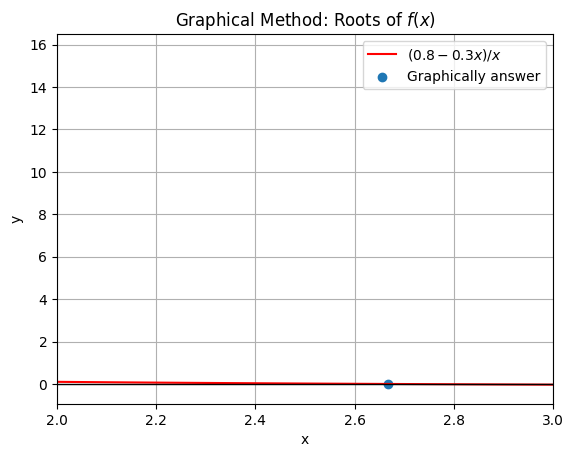

In [5]:
# YOUR CODE HERE
import numpy as np
from matplotlib import pyplot as plt
f = lambda x : (0.8 - 0.3*x)/x

x = np.linspace(0,5,101)

plt.plot(x, f(x), color='r')
plt.scatter(8/3,f(8/3))
plt.axhline(0, color='black',linewidth=1)
plt.xlim(2,3)
plt.title("Graphical Method: Roots of $f(x)$")
plt.legend(['$(0.8 - 0.3x)/x$', 'Graphically answer'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [6]:
# Write your answers (b)
# Save the result in ans_b

# YOUR CODE HERE
f = lambda x: (0.8 - 0.3*x) / x
def bisect(a, b, f, tol=0.001, iter_max=30):
    '''
    Bisection method

    Parameters
    ----------
    a : float
        lower limit
    b : float
        upper limit
    f : function
        함수
    tol : float
        tolerance
    iter_max : int
        maximun iterations
    '''
    fa,  fb = f(a), f(b)
    product = f(a)*f(b)
    #구간 경계에서 해가 존재하는 경우
    if product == 0 :
      if fa == 0 :
        print(f'Converged : {a}')
        return a

      else :
        print(f'Converged : {b}')
        return b

    #구간 내에 해가 없을 경우
    elif product > 0 :
       raise ValueError('Wrong Intervals')

    else : #구간 내 해가 있고 경계가 해가 아닐 때 bisection method를 진행
      #Compute midpoint
      c = 0.5*(a+b)
      for i in range(iter_max) :
        if f(a)*f(c) < 0 :
          b = c

        elif f(b)*f(c) < 0 :
          a = c
        #Save old midpoint
        c0 = c

        #Compute new midpoint
        c = 0.5*(a+b)

        eps_ai = abs(c-c0)/max(abs(c), tol)
        if eps_ai < tol :
          print(f'Converged at {c}')
          return c
ans_b = bisect(1, 3, f, tol=1e-3, iter_max=50)

Converged at 2.666015625


In [7]:
# Write your answers (c)
# Save the result in ans_c

# YOUR CODE HERE
f = lambda x: (0.8 - 0.3*x) / x

def falseposition(a, b, f, tol=0.001, iter_max=50):
    # Write your answer
    '''
    False position

    Parameters
    ----------
    a : float
        lower limit
    b : float
        upper limit
    f : function
        함수
    tol : float
        tolerance
    iter_max : int
        maximun iterations
    '''
    fa,  fb = f(a), f(b)
    product = f(a)*f(b)
    #구간 경계에서 해가 존재하는 경우
    if product == 0 :
      if fa == 0 :
        print(f'Converged : {a}')
        return a

      else :
        print(f'Converged : {b}')
        return b

    #구간 내에 해가 없을 경우
    elif product > 0 :
       raise ValueError('Wrong Intervals')

    else : #구간 내 해가 있고 경계가 해가 아닐 때 bisection method를 진행
      #Compute midpoint
      c = b - f(b)*(a-b)/(f(a)-f(b))
      for i in range(iter_max) :
        if f(a)*f(c) < 0 :
          b = c

        elif f(b)*f(c) < 0 :
          a = c
        #Save old midpoint
        c0 = c

        #Compute new midpoint
        c =  b - f(b)*(a-b)/(f(a)-f(b))

        eps_ai = abs(c-c0)/max(abs(c), tol)
        if eps_ai < tol :
          print(f'Converged at {c}')

          return c
ans_c = falseposition(1, 3, f, tol=1e-3, iter_max=50)

Converged at 2.6696983156725764


## Problem #4
Water is flowing in a trapezoidal channel at a rate of $Q=20m^3/s$. The critical depth y for such a channel must satisfy the equation
$$
0 = 1 - \frac{Q^2}{gA_c^3} B
$$
where $g=9.81 m/s2$, $A_c =$ the cross-sectional area ($m^2$), and $B=$ the width of the channel at the surface (*m*). For this case, the width and the cross-sectional area can be related to depth *y* by
$$
B = 3 + y, A_c  = 3y + \frac{y^2}{2}
$$
Solve for the critical depth using
(a) the graphical method, (b) bisection, and (c) false position.
For (b) and (c) use initial guesses of $a=0.5$ and $b=2.5$, and iterate until the approximate error falls below $0.1 \%$.

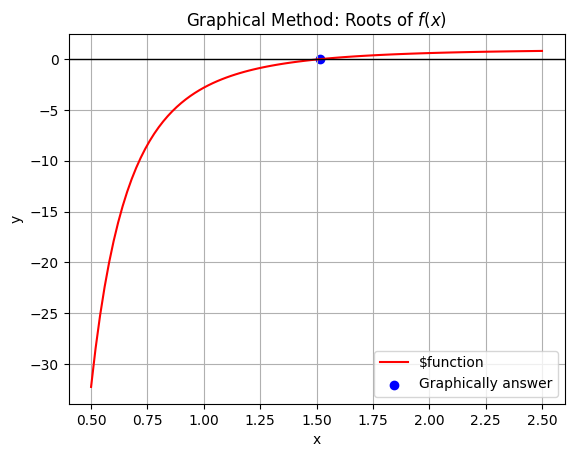

In [8]:
# YOUR CODE HERE
from matplotlib import pyplot as plt
import numpy as np
Q = 20
g = 9.81

def f(y):
    B = 3+y
    Ac = 3*y + y**2/2

    return 1 - Q**2 / (g*Ac**3) * B

y = np.linspace(0.5,2.5,101)

plt.plot(y, f(y), color='r')
plt.scatter(1.5146484375, f(1.5146484375), color ='b')
plt.axhline(0, color='black',linewidth=1)
#plt.xlim(1.25,1.75)
plt.title("Graphical Method: Roots of $f(x)$")
plt.legend(['$function', 'Graphically answer'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [9]:
# Write your answers (b)
# Save the result in ans_b

# YOUR CODE HERE
Q = 20
g = 9.81

def f(y):
    B = 3+y
    Ac = 3*y + y**2/2

    return 1 - Q**2 / (g*Ac**3) * B

def bisect(a, b, f, tol=0.001, iter_max=50):
    '''
    Bisection method

    Parameters
    ----------
    a : float
        lower limit
    b : float
        upper limit
    f : function
        함수
    tol : float
        tolerance
    iter_max : int
        maximun iterations
    '''
    fa,  fb = f(a), f(b)
    product = f(a)*f(b)
    #구간 경계에서 해가 존재하는 경우
    if product == 0 :
      if fa == 0 :
        print(f'Converged : {a}')
        return a

      else :
        print(f'Converged : {b}')
        return b

    #구간 내에 해가 없을 경우
    elif product > 0 :
       raise ValueError('Wrong Intervals')

    else : #구간 내 해가 있고 경계가 해가 아닐 때 bisection method를 진행
      #Compute midpoint
      c = 0.5*(a+b)
      for i in range(iter_max) :
        if f(a)*f(c) < 0 :
          b = c

        elif f(b)*f(c) < 0 :
          a = c
        #Save old midpoint
        c0 = c

        #Compute new midpoint
        c = 0.5*(a+b)

        eps_ai = abs(c-c0)/max(abs(c), tol)
        if eps_ai < tol :
          print(f'Converged at {c}')

          return c


ans_b = bisect(0.5, 2.5, f, iter_max=100, tol=1e-3)

Converged at 1.5146484375


In [10]:
# Write your answers (c)
# Save the result in ans_c

# YOUR CODE HERE
Q = 20
g = 9.81

def f(y):
    B = 3+y
    Ac = 3*y + y**2/2

    return 1 - Q**2 / (g*Ac**3) * B

def falseposition(a, b, f, tol=0.001, iter_max=100):
    '''
    False position

    Parameters
    ----------
    a : float
        lower limit
    b : float
        upper limit
    f : function
        함수
    tol : float
        tolerance
    iter_max : int
        maximun iterations
    '''
    fa,  fb = f(a), f(b)
    product = f(a)*f(b)
    #구간 경계에서 해가 존재하는 경우
    if product == 0 :
      if fa == 0 :
        print(f'Converged : {a}')
        return a

      else :
        print(f'Converged : {b}')
        return b

    #구간 내에 해가 없을 경우
    elif product > 0 :
       raise ValueError('Wrong Intervals')

    else : #구간 내 해가 있고 경계가 해가 아닐 때 bisection method를 진행
      #Compute midpoint
      c = b - f(b)*(a-b)/(f(a)-f(b))
      for i in range(iter_max) :
        if f(a)*f(c) < 0 :
          b = c

        elif f(b)*f(c) < 0 :
          a = c
        #Save old midpoint
        c0 = c

        #Compute new midpoint
        c =  b - f(b)*(a-b)/(f(a)-f(b))

        eps_ai = abs(c-c0)/max(abs(c), tol)
        if eps_ai < tol :
          print(f'Converged at {c}')
          return c


ans_c = falseposition(0.5, 2.5, f, iter_max=100, tol=1e-3)
### END SOLUTION

Converged at 1.5347323625278309
